In [6]:
import requests
import pandas as pd
from prophet import Prophet
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

API CMF

Documentación .v3: Unidad de Fomento (UF)
El recurso Unidad de Fomento (UF) permite acceder a la información almacenada en la base de datos del sitio web institucional, la cual es recopilada para ser usada en diferentes aplicaciones.

Recursos disponibles
Los recursos disponibles para la Unidad de Fomento (UF) son los siguientes:

UF del día actual:
Descripción: Permite obtener un listado en xml o json con el valor de la UF para el día actual.

Autentificación: Al hacer la consulta se debe entregar la API Key junto con los argumentos.

Input: https://api.cmfchile.cl/api-sbifv3/recursos_api/<UF|uf>?apikey=<api_key>&formato=<json|JSON|xml|XML>&callback=<funcion_de_callback>

Ejemplo: https://api.cmfchile.cl/api-sbifv3/recursos_api/uf?apikey=SBIF9990SBIF44b7SBIF7f4c5a537d02358e1099&formato=xml

https://api.cmfchile.cl/api-sbifv3/recursos_api/uf/posteriores/2018?apikey=7229d850a6ce3342090c86bd2e9b515fcf7a958b&formato=json

Resultado: Entrega un archivo en formato xml con el valor de la UF para el día actual.

In [7]:
### Montando a estrutura da requisicao para a API
### Para solicitar a API key = https://api.cmfchile.cl/documentacion/UF.html
APIkey = '7229d850a6ce3342090c86bd2e9b515fcf7a958b'
Ano_inicial = 2017
url = f'https://api.cmfchile.cl/api-sbifv3/recursos_api/uf/posteriores/{Ano_inicial}?apikey={APIkey}&formato=json'

In [8]:
response = requests.get(url)
dados = pd.DataFrame.from_dict(response.json())
dados = pd.json_normalize(dados['UFs'])

In [9]:
response.json()

{'UFs': [{'Valor': '26.799,01', 'Fecha': '2018-01-01'},
  {'Valor': '26.799,87', 'Fecha': '2018-01-02'},
  {'Valor': '26.800,73', 'Fecha': '2018-01-03'},
  {'Valor': '26.801,60', 'Fecha': '2018-01-04'},
  {'Valor': '26.802,46', 'Fecha': '2018-01-05'},
  {'Valor': '26.803,33', 'Fecha': '2018-01-06'},
  {'Valor': '26.804,19', 'Fecha': '2018-01-07'},
  {'Valor': '26.805,05', 'Fecha': '2018-01-08'},
  {'Valor': '26.805,92', 'Fecha': '2018-01-09'},
  {'Valor': '26.806,78', 'Fecha': '2018-01-10'},
  {'Valor': '26.807,65', 'Fecha': '2018-01-11'},
  {'Valor': '26.808,51', 'Fecha': '2018-01-12'},
  {'Valor': '26.809,38', 'Fecha': '2018-01-13'},
  {'Valor': '26.810,24', 'Fecha': '2018-01-14'},
  {'Valor': '26.811,11', 'Fecha': '2018-01-15'},
  {'Valor': '26.811,97', 'Fecha': '2018-01-16'},
  {'Valor': '26.812,84', 'Fecha': '2018-01-17'},
  {'Valor': '26.813,70', 'Fecha': '2018-01-18'},
  {'Valor': '26.814,56', 'Fecha': '2018-01-19'},
  {'Valor': '26.815,43', 'Fecha': '2018-01-20'},
  {'Valor': '

In [10]:
#type(dados)
dados.head()

,Valor,Fecha
0,"26.799,01",2018-01-01
1,"26.799,87",2018-01-02
2,"26.800,73",2018-01-03
3,"26.801,60",2018-01-04
4,"26.802,46",2018-01-05


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Valor   2291 non-null   object
 1   Fecha   2291 non-null   object
dtypes: object(2)
memory usage: 35.9+ KB


Ajustando o Data Frame para treinamento

In [12]:
dados['Fecha']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
2286    2024-04-05
2287    2024-04-06
2288    2024-04-07
2289    2024-04-08
2290    2024-04-09
Name: Fecha, Length: 2291, dtype: object

In [13]:
dados['Fecha'] = dados['Fecha'].astype('datetime64[ns]')
dados['Valor'] = dados['Valor'].apply(lambda x: x.replace('.','').replace(',','.')).astype(np.float64)
dados.head()

,Valor,Fecha
0,26799.01,2018-01-01
1,26799.87,2018-01-02
2,26800.73,2018-01-03
3,26801.60,2018-01-04
4,26802.46,2018-01-05


In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Valor   2291 non-null   float64       
 1   Fecha   2291 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.9 KB


In [15]:
df_final = dados[['Fecha', 'Valor']].rename(columns={'Fecha': 'ds', 'Valor': 'y'}).copy()
print(df_final.head())
print(df_final.info())

          ds         y
0 2018-01-01  26799.01
1 2018-01-02  26799.87
2 2018-01-03  26800.73
3 2018-01-04  26801.60
4 2018-01-05  26802.46
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2291 non-null   datetime64[ns]
 1   y       2291 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.9 KB
None


Exportando base extraida desde el sitio de la CMF en csv

In [16]:
df_final.to_csv('../data_raw/CMF_UF_desdeEnero2018.csv')

In [17]:
df_final.head()

,ds,y
0,2018-01-01,26799.01
1,2018-01-02,26799.87
2,2018-01-03,26800.73
3,2018-01-04,26801.60
4,2018-01-05,26802.46


Visualizando la serie

In [18]:
df_plot = df_final.set_index('ds')
##df_plot.columns = ['y']
df_plot = df_plot.rename_axis('Fecha')
df_plot

,y
Fecha,
2018-01-01,26799.01
2018-01-02,26799.87
2018-01-03,26800.73
2018-01-04,26801.60
2018-01-05,26802.46
...,...
2024-04-05,37129.33
2024-04-06,37136.49
2024-04-07,37143.66


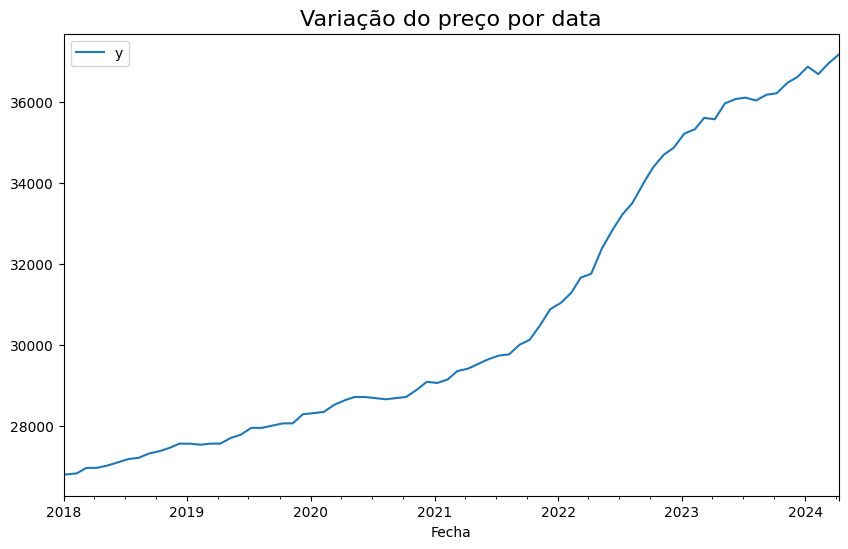

In [19]:

df_plot['y'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['y'])

Entrenar el Prophert

In [20]:
df_final['ds'].max()

Timestamp('2024-04-09 00:00:00')

In [21]:
df_final.head()

,ds,y
0,2018-01-01,26799.01
1,2018-01-02,26799.87
2,2018-01-03,26800.73
3,2018-01-04,26801.60
4,2018-01-05,26802.46


In [22]:
dados_treino = df_final[df_final['ds'] <= '2023-12-31']
dados_teste = df_final[df_final['ds'] > '2023-12-31']

In [23]:
dados_prophet_treino = dados_treino.copy()
dados_prophet_treino.head()

,ds,y
0,2018-01-01,26799.01
1,2018-01-02,26799.87
2,2018-01-03,26800.73
3,2018-01-04,26801.60
4,2018-01-05,26802.46


In [24]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=False,
        yearly_seasonality=True,
        daily_seasonality=True)

modelo.add_country_holidays(country_name='CL')

modelo.fit(dados_prophet_treino)

21:21:19 - cmdstanpy - INFO - Chain [1] start processing
21:21:21 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
futuro = modelo.make_future_dataframe(periods=365)
previsao = modelo.predict(futuro)

In [26]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints' Day,All Saints' Day_lower,All Saints' Day_upper,Army Day,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,26793.102258,26748.280043,26810.820957,26793.102258,26793.102258,0.0,0.0,0.0,0.0,...,6.863313,6.863313,6.863313,-16.571527,-16.571527,-16.571527,0.0,0.0,0.0,26780.288007
1,2018-01-02,26793.806381,26747.327151,26810.355489,26793.806381,26793.806381,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-14.465371,-14.465371,-14.465371,0.0,0.0,0.0,26776.234973
2,2018-01-03,26794.510505,26749.164800,26810.627854,26794.510505,26794.510505,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-12.333851,-12.333851,-12.333851,0.0,0.0,0.0,26779.070616
3,2018-01-04,26795.214628,26752.028158,26812.632351,26795.214628,26795.214628,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-10.189691,-10.189691,-10.189691,0.0,0.0,0.0,26781.918900
4,2018-01-05,26795.918751,26752.546670,26816.852565,26795.918751,26795.918751,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-8.047192,-8.047192,-8.047192,0.0,0.0,0.0,26784.765521


In [27]:
previsao.iloc[previsao['ds'].idxmax()]


ds                            2024-12-30 00:00:00
trend                                38575.691566
yhat_lower                           36415.795294
yhat_upper                           40791.593633
trend_lower                          36455.416645
                                     ...         
yearly_upper                           -20.165067
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                 38552.420461
Name: 2555, Length: 73, dtype: object

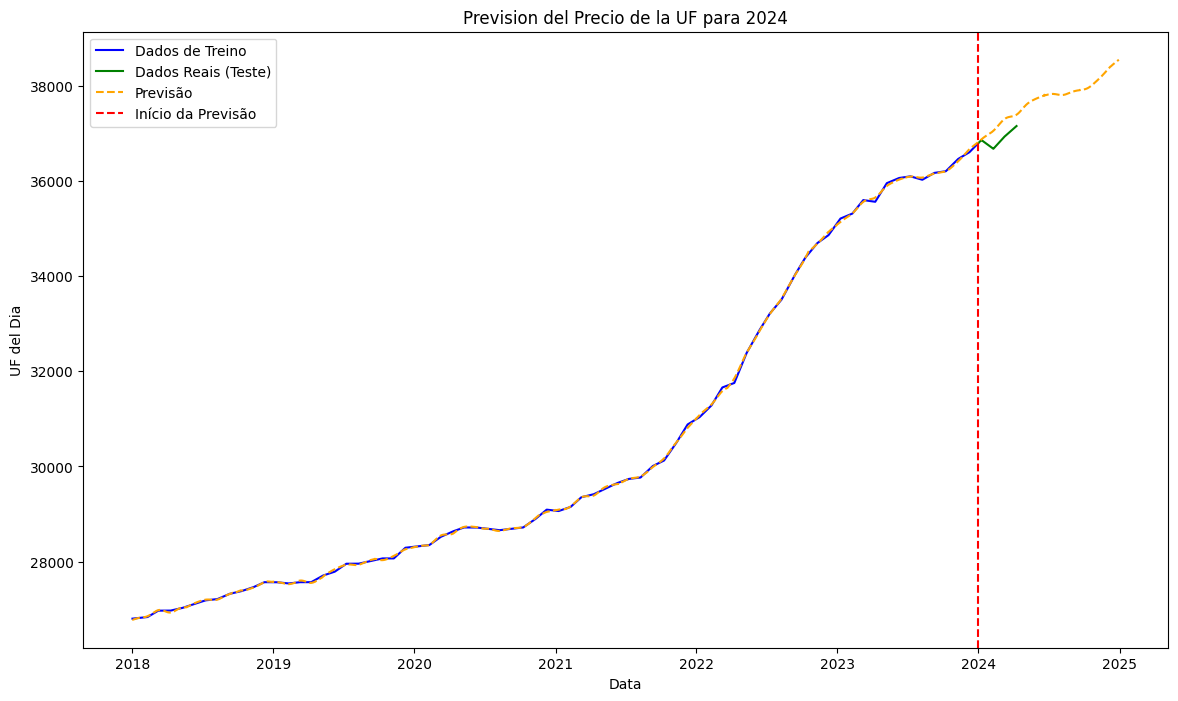

In [28]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['ds'], dados_treino['y'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['ds'], dados_teste['y'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['ds'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('UF del Dia')
plt.title('Prevision del Precio de la UF para 2024')
plt.legend()
plt.show()